# Arrayed Variables in XMILE Models

This notebook illustrates how to work with XMILE models that contain arrays.

BPTK_Py supports arrayed variables out of the box. You can access them easily just the way you would in Stella Equations. This lets you plot them easily. The advantage of analysing arrayed variables in BPTK_Py is that you can plot anything easily and quickly. It supports a rapid and quick analytics approach. Along with Jupyter, you can create great stories, pointing out cost drivers and growth opportunities for your business models.

In [1]:
from BPTK_Py import bptk
bptk = bptk()

In [2]:
#| echo: false
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

## A simple arrayed model

Let's have a look at an example. We are working with a model simulating a production chain. It comes with 2 dimensions (country and product). Country is any of Germany, England, Austria or Greece. The products are identified by numbers 1 to 3. 

The important components of the model are the 2 stocks ``Production`` and ``Inventory`` and the flows ``production start`` and ``production rate``. The converters mostly compute averages or means for demonstration purposes.

![sd_arrayed_1.png](sd_arrayed_1.png)

## Plot total of all dimensions

Let us suppose, for an initial data analysis we want to get a high level overview over the inventory for all products in all countries.
For this purpose, BPTK_Py supports the asterisk and array notation ``inventory[*,*]`` as we are used to from Stella Architect. For simplification purposes, we also added a shortcut. For the sum of all dimensions of a stock, you can just use the name of the stock without any array operator. 

Hence, plotting ``inventory[*,*]`` and ``inventory`` returns the same graph:

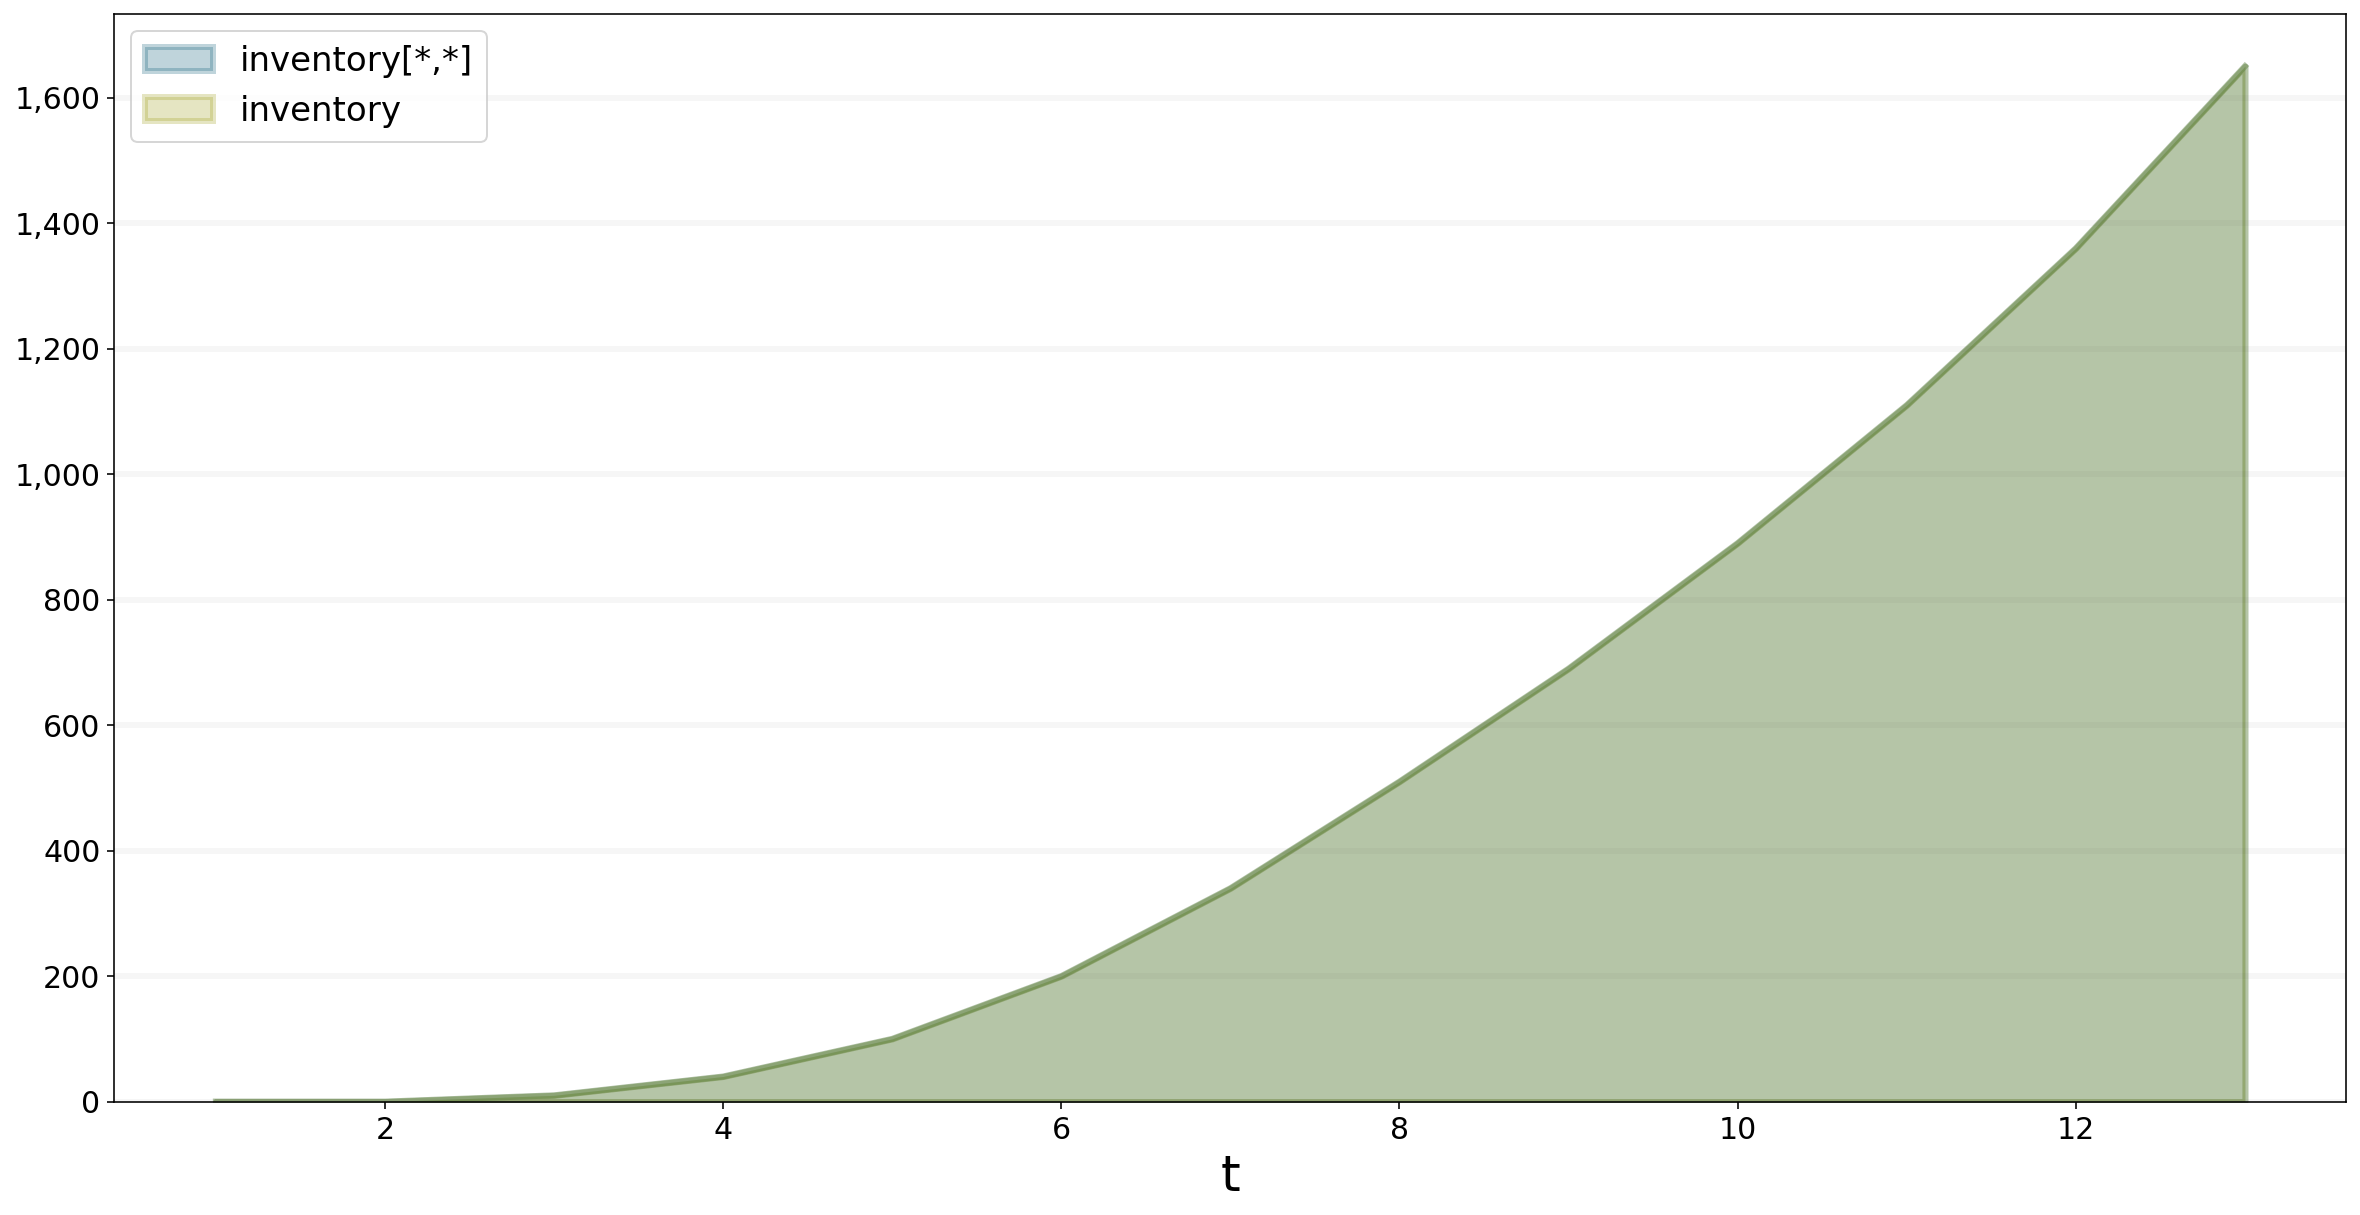

In [3]:
bptk.plot_scenarios(
    scenario_managers=["smArrayedVariables"],
    scenarios=["base"], 
    equations=["inventory[*,*]","inventory"]
)

## Analyse a single product inventory in all countries

Now that we saw a rising inventory for all products in all countries, we want to get to the bottom of it and understand which product drives the inventory

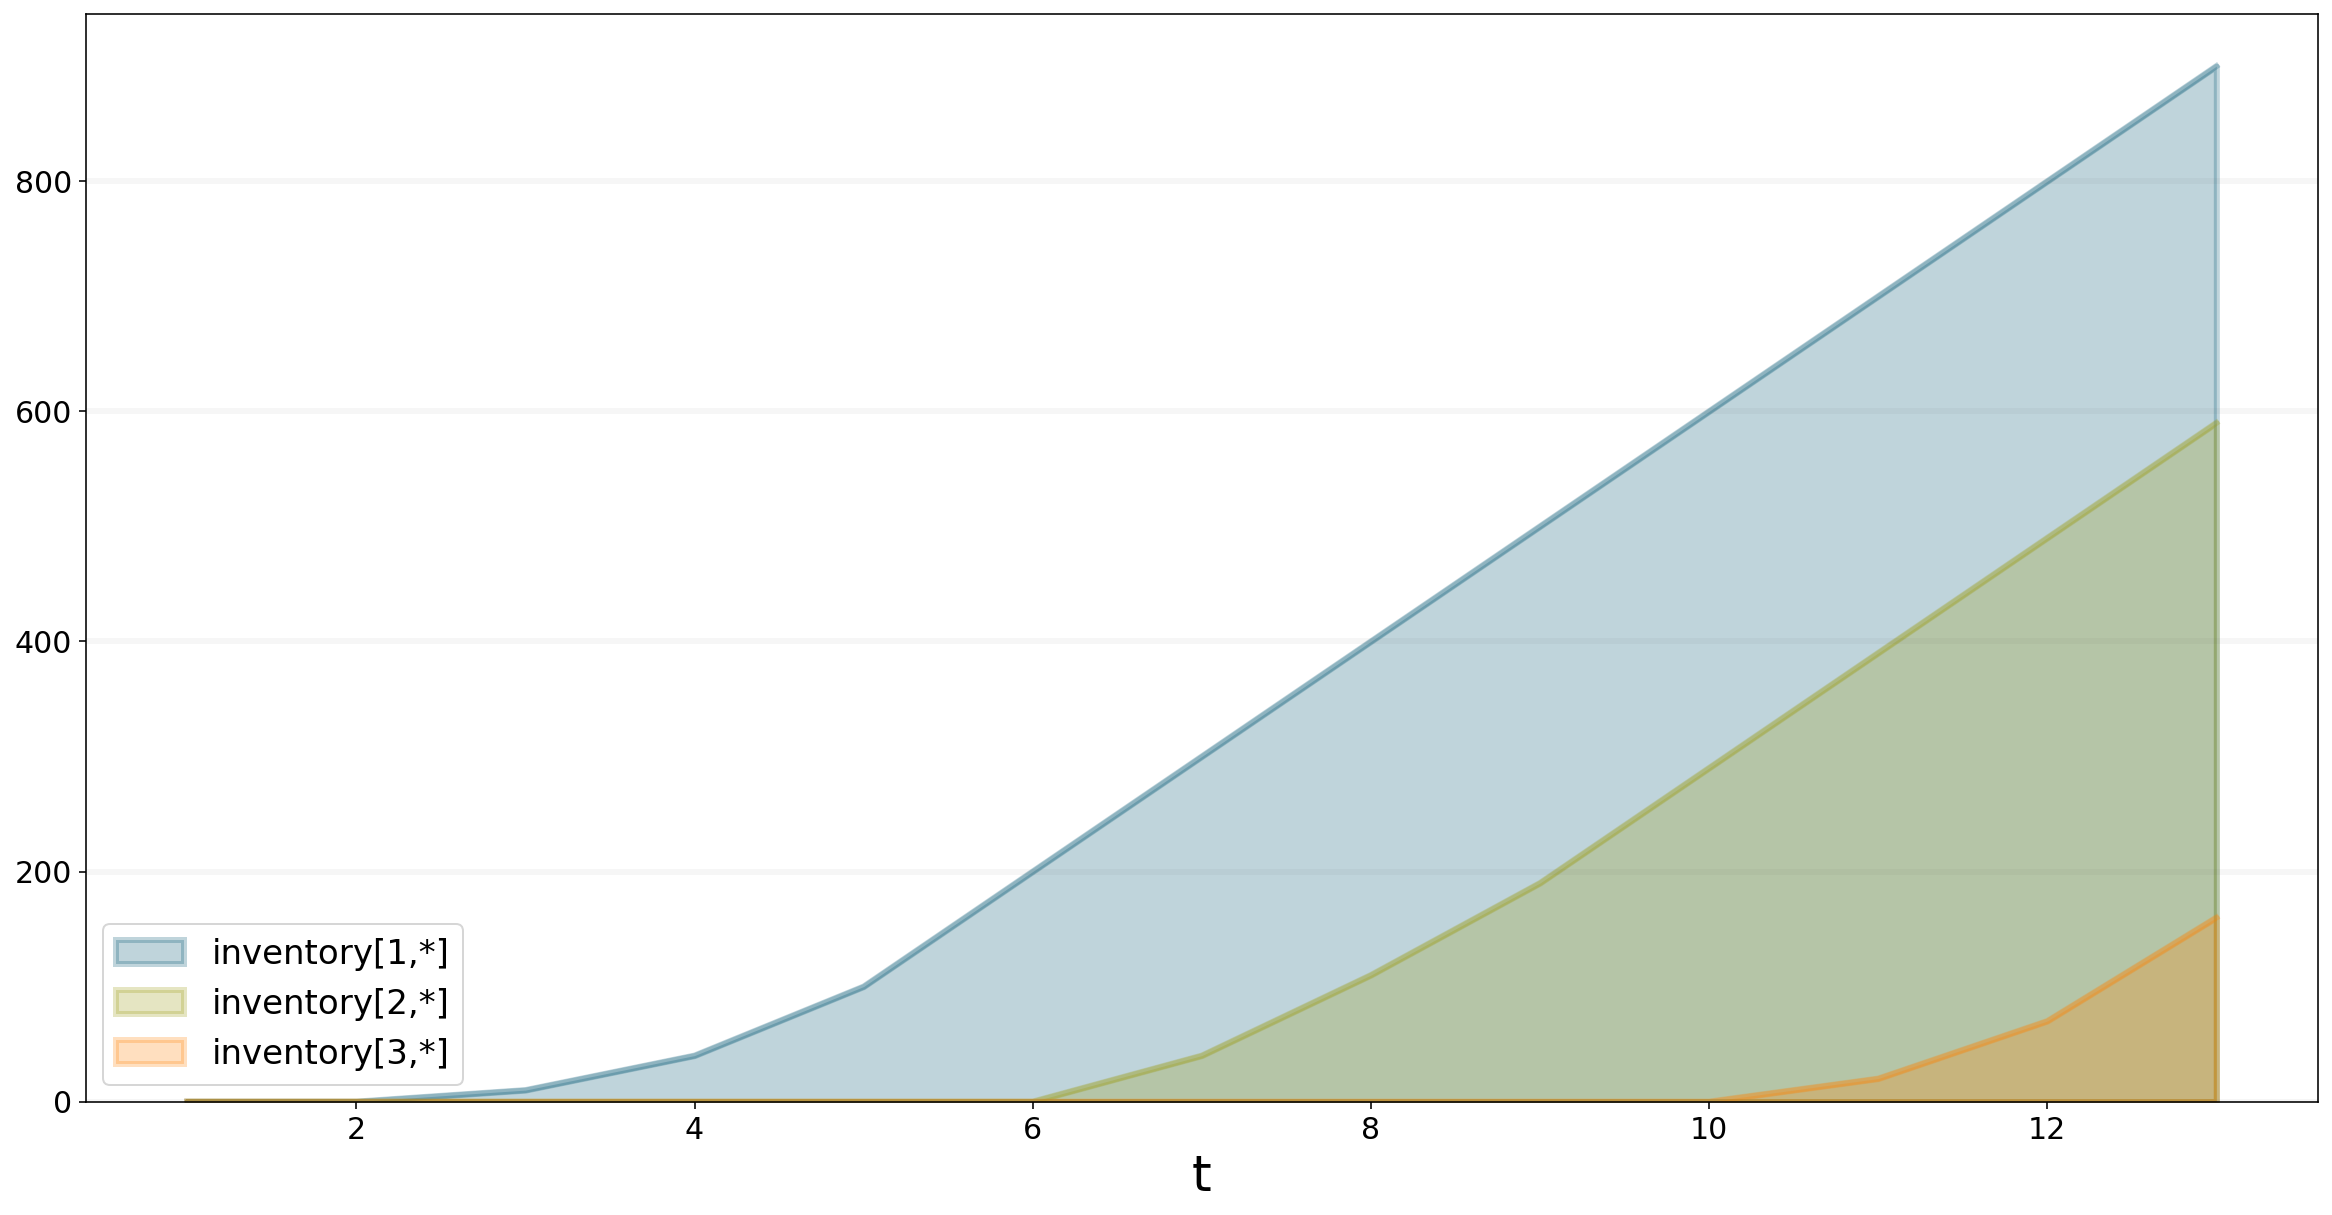

In [4]:
bptk.plot_scenarios(
    scenario_managers=["smArrayedVariables"],
    scenarios=["base"], 
    equations=["inventory[1,*]","inventory[2,*]","inventory[3,*]"]
)


We learned that the inventory for product 1 is very high. Further analysis may include looking at the countries and where the inventory is especially high, i.e. plotting ``inventory`` for all countries: ``inventory[1,germany], inventory[1,england]`` and so on:


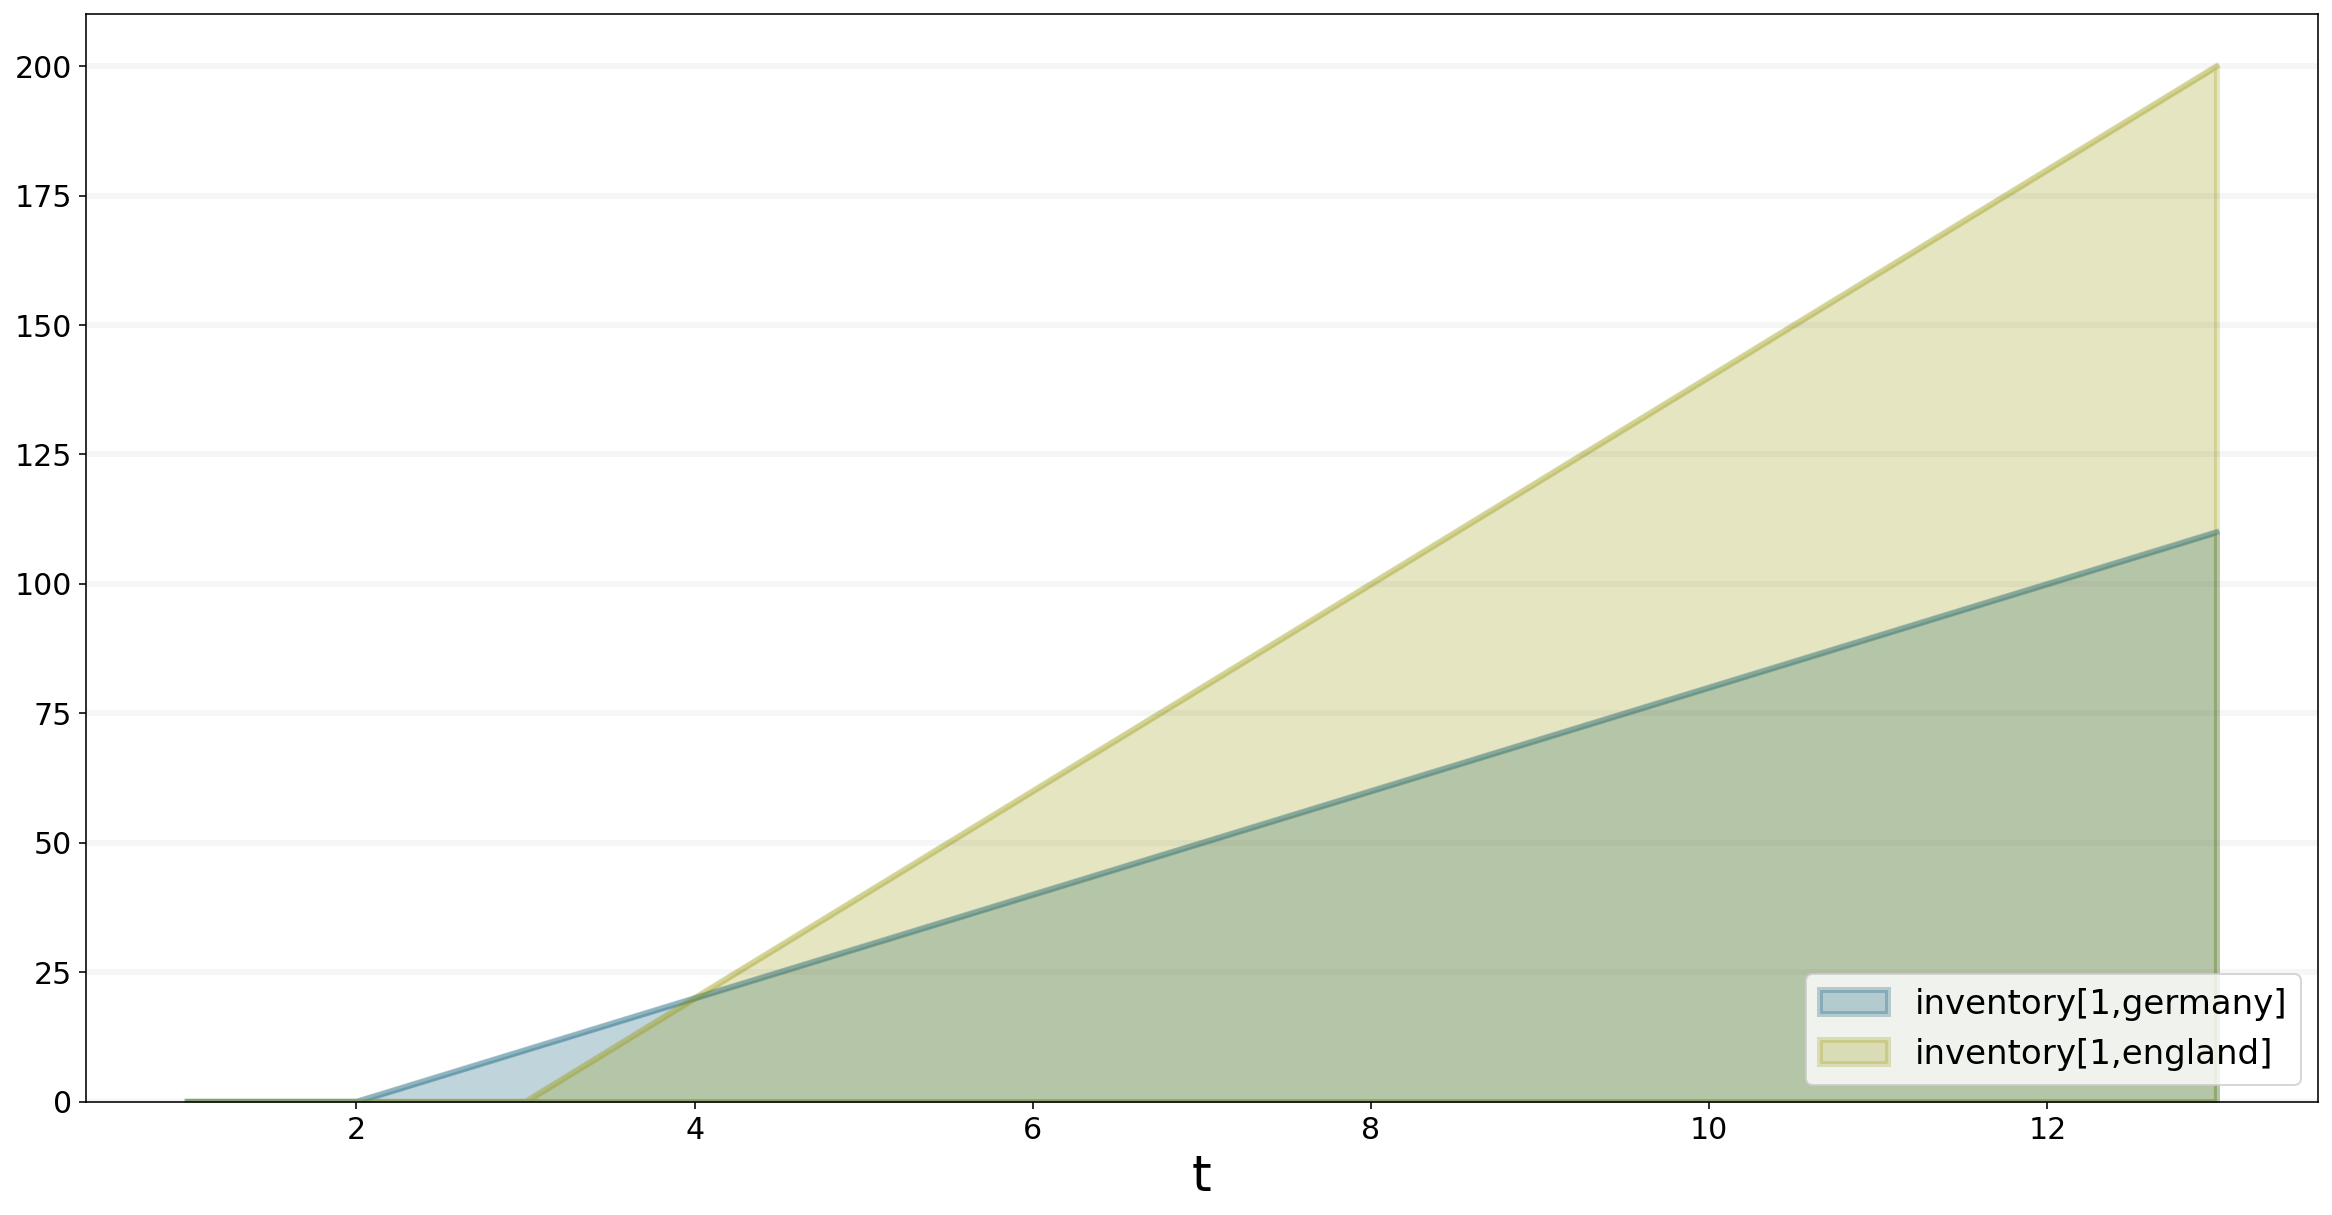

In [5]:
bptk.plot_scenarios(
    scenario_managers=["smArrayedVariables"],
    scenarios=["base"], 
    equations=["inventory[1,germany]","inventory[1,england]"]
)

We observe that the inventory rises early in Germany but England quickly surpasses at t=3. Further analysis may be possible here. But for demonstration purposes, let us jump over to another interesting features.

## Advanced Array Functions
But for now, let's go ahead and look at more advanced plotting functions.
BPTK_Py supports all array functions as outlined in the [Stella Architect builtins documentation](https://www.iseesystems.com/resources/help/v1-9/default.htm#08-Reference/07-Builtins/Array_builtins.htm)

In the model, we built a converter ``average Inventory`` using the ``MEAN`` equation: ``MEAN(Inventory[*; *])``. The converter ``total Inventory`` uses the ``SUM`` function. It returns the same results as when using ``inventory[*,*]`` in BPTK_Py. The transpiler makes sure to translate the equations properly to simulate them in Python:

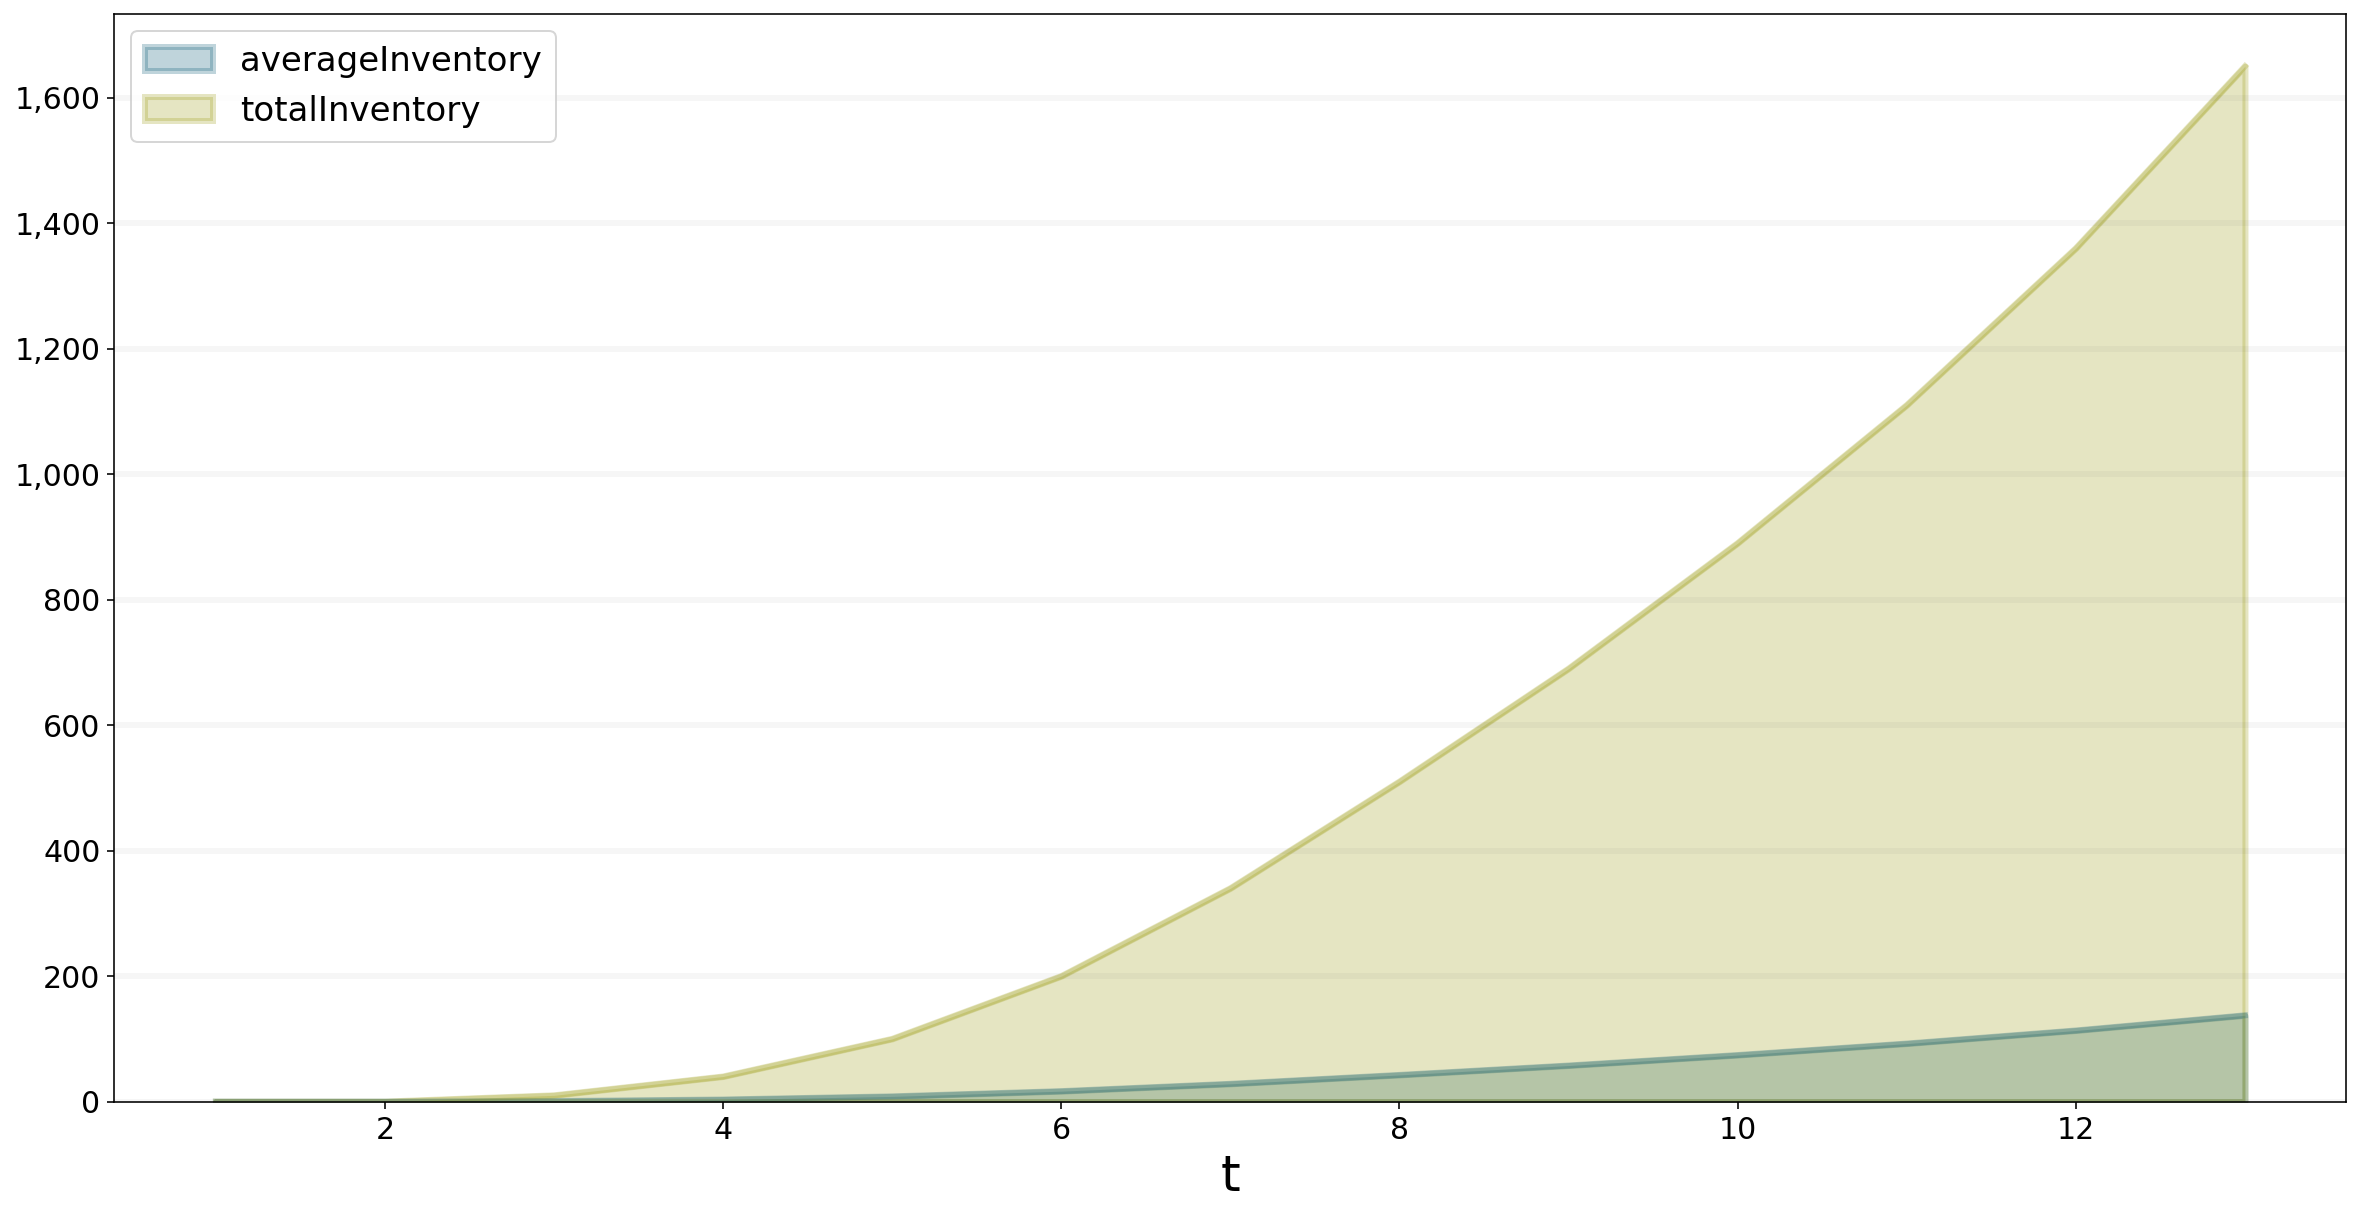

In [6]:
bptk.plot_scenarios(
    scenario_managers=["smArrayedVariables"],
    scenarios=["base"], 
    equations=["averageInventory","totalInventory"]
)

## Finished

That's it for now. You learned how easy it is to use arrayed elements in XMILE models inside BPTK_Py. This functionality lets you quickly analyse your model and draw conclusions, all within the great Jupyter environment!